In [4]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask
ds_climo = xr.open_dataset('https://www.atmos.illinois.edu/~snesbitt/data/ERA-5_total_precipitation_monthly-1981-2020.nc', engine = 'h5netcdf')

ds_climo.to_netcdf('ERA-5_total_precipitation_monthly-1981-2020.nc')

In [5]:
total_clim = xr.open_dataset('ERA-5_total_precipitation_monthly-1981-2020.nc')

In [4]:
total_clim

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 372, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 1990-01-01T06:00:00 ... 2020-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    expver      (valid_time) <U4 6kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-22T22:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
precip =total_clim['tp'].sel(valid_time=slice('1990-01-01 00:00','2000-12-31 23:59'),latitude = slice(43.3, 38.3) ,longitude=slice(283.5, 288.5))
precip

<xarray.DataArray 'tp' (valid_time: 132, latitude: 20, longitude: 21)> Size: 222kB
[55440 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 1kB 1990-01-01T06:00:00 ... 2000-...
  * latitude    (latitude) float64 160B 43.25 43.0 42.75 ... 39.0 38.75 38.5
  * longitude   (longitude) float64 168B 283.5 283.8 284.0 ... 288.0 288.2 288.5
    number      int64 8B ...
    expver      (valid_time) <U4 2kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

(1) Use the precipitation output of ERA-5 to compute a time series of daily precipitation at a given point closest to a city of your choosing. Choose a box of 5 x 5 deg lat-lon values over the grid box closest to the city you are examining.  Save this data.  Use a period of at least 10 years.

In [8]:
#precip.to_netcdf('CentralPark_Precip_1990_2000.nc')
cp_tp = xr.open_dataarray('CentralPark_Precip_1990_2000.nc')

In [9]:
# Resample to daily to calculate daily precipitation in Central Park in the 90s
cp_daily = cp_tp.resample(valid_time='1D').sum()
cp_daily

<xarray.DataArray 'tp' (valid_time: 3988, latitude: 20, longitude: 21)> Size: 7MB
array([[[0.00296021, 0.0030098 , 0.00352478, ..., 0.00338554,
         0.00321198, 0.00311375],
        [0.00292969, 0.00302315, 0.00319576, ..., 0.00335979,
         0.00319004, 0.00315857],
        [0.00289345, 0.00325775, 0.00333881, ..., 0.00345421,
         0.00335026, 0.0032835 ],
        ...,
        [0.00311661, 0.00361633, 0.00310612, ..., 0.00354862,
         0.00343895, 0.00345612],
        [0.00319195, 0.00369358, 0.00299644, ..., 0.00310707,
         0.00311947, 0.00316715],
        [0.00322056, 0.0036726 , 0.00292206, ..., 0.00296593,
         0.00306511, 0.00312614]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.00357628, 0.00379181, 0.00401688, ..., 0.00283432,
         0.0029068 , 0.00288963],
        [0.0028286 , 0.00310707, 0.00336838, ..., 0.0028553 ,
         0.00286102, 0.00268745],
        [0.00259018, 0.00299454, 0.00323105, ..., 0.00293922,
         0.00282669, 0.00262833],
        ...,
        [0.00273132, 0.00332451, 0.00222206, ..., 0.00394058,
         0.0038662 , 0.00366402],
        [0.00252724, 0.0030632 , 0.00206375, ..., 0.00402832,
         0.0036335 , 0.00354385],
        [0.002388  , 0.00268936, 0.0018692 , ..., 0.00378227,
         0.00348473, 0.00341225]]], shape=(3988, 20, 21), dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 32kB 1990-01-01 ... 2000-12-01
  * latitude    (latitude) float64 160B 43.25 43.0 42.75 ... 39.0 38.75 38.5
  * longitude   (longitude) float64 168B 283.5 283.8 284.0 ... 288.0 288.2 288.5
    number      int64 8B ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

(2) Determine the 95% values of daily precipitation for the data created in (1).  Plot a *cumulative distribution function* of all values daily precipitation values and illustrate the 95% value of daily precipitation in millimeters.

In [ ]:
# Convert to mm
cp_mm = cp_daily * 1000  # from meters to millimeters

# Compute mean over entire area
daily_mean = cp_mm.mean(dim=("latitude", "longitude"), skipna=True)


# Find days exceeding the 95th percentile (extreme days)
cp_95 = np.nanpercentile(daily_mean.values, 95)
extreme_days = daily_mean["valid_time"][daily_mean > cp_95]
print(f"Number of 95th-percentile days: {len(extreme_days.values)}")
print(f"95th percentile of daily precipitation in Central Park: {cp_95:.2f} mm")

Number of 95th-percentile days: 7
95th percentile of daily precipitation in Central Park: 5.06 mm


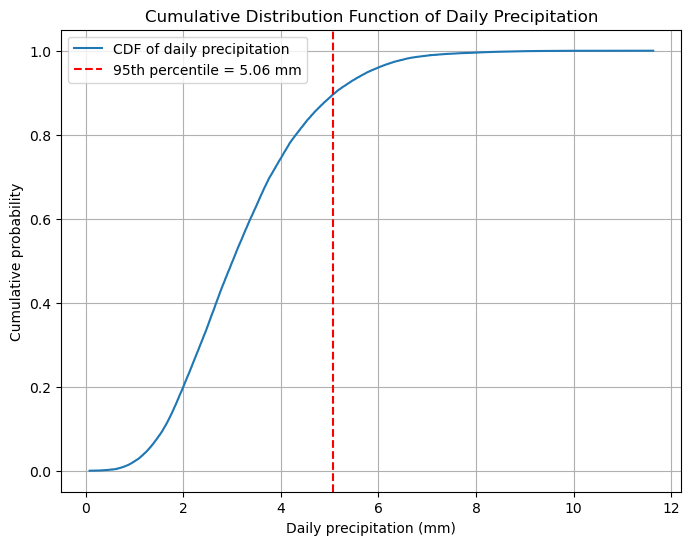

In [ ]:
# Sort the data for the CDF
cp_flatten = cp_mm.values.flatten()
cp_flatten = cp_flatten[~np.isnan(cp_flatten)]
cp_sorted = np.sort(cp_flatten)
cdf = np.arange(1, len(cp_sorted)+1) / len(cp_sorted)

# Plot the CDF
plt.figure(figsize=(8,6))
plt.plot(cp_sorted, cdf, label='CDF of daily precipitation')
plt.axvline(cp_95, color='r', linestyle='--', label=f'95th percentile = {cp_95:.2f} mm')
plt.xlabel('Daily precipitation (mm)')
plt.ylabel('Cumulative probability')

plt.title('Cumulative Distribution Function of Daily Precipitation')
plt.legend()
plt.grid(True)
plt.show()


(3) Create a map of the composite mean precipitation on the 95% days identified in (2) over the continental USA, and a map of the anomaly of precipitation from the 1981-2010 mean. This field should be plotted on a Cartopy map centered at your city with a 40 x 40 degree lat-lon range.

In [ ]:
# Select 95th percentile days
cp_composite = cp_mm.sel(valid_time=extreme_days).mean(dim="valid_time",skipna = True)


In [ ]:
# Subset original dataset to 1981-2010 Central Park mean
ds_clim_sub = total_clim['tp'].sel(valid_time=slice('1981-01-01', '2010-12-31'),latitude = slice(43.3, 38.3) ,longitude=slice(283.5, 288.5))
clim_mean = ds_clim_sub.mean(dim="valid_time", skipna = True) 
clim_mean_mm = clim_mean * 1000


In [ ]:
# Calculate Central Park Anomlies
cp_anomaly = cp_composite - clim_mean_mm
cp_anomaly 

<xarray.DataArray 'tp' (latitude: 20, longitude: 21)> Size: 2kB
array([[1.1270843, 1.2481589, 1.4367824, 1.4333987, 1.5014617, 1.5710993,
        1.7894187, 2.0540442, 2.2336602, 2.4079065, 2.3735328, 2.4226887,
        2.4146085, 2.3605144, 2.2249749, 2.207669 , 2.206352 , 2.2784073,
        2.265408 , 2.2829714, 2.298132 ],
       [1.3050051, 1.381053 , 1.3787177, 1.3711343, 1.4690027, 1.6457806,
        1.8631201, 2.1493473, 2.3180227, 2.4548104, 2.4038684, 2.432388 ,
        2.453066 , 2.3925343, 2.5529482, 2.6516538, 2.5586855, 2.369801 ,
        2.3486652, 2.3653316, 2.3058748],
       [1.4657595, 1.4281273, 1.4644313, 1.5381596, 1.6870914, 1.6971619,
        1.9166017, 2.2302356, 2.4029677, 2.3971665, 2.3305604, 2.3311322,
        2.4701264, 2.4445283, 2.7457306, 3.0061026, 2.730627 , 2.497321 ,
        2.485548 , 2.4943202, 2.3725715],
       [1.6681771, 1.6659858, 1.7390895, 1.8492389, 1.9473157, 1.858238 ,
        1.973788 , 2.1994722, 2.3755724, 2.4395633, 2.424263 , 2.4094694,
        2.5256212, 2.737344 , 3.120256 , 3.041487 , 2.9133537, 2.6660798,
        2.6423705, 2.5884044, 2.4564378],
       [1.7657769, 1.786849 , 1.892283 , 1.9911585, 2.0731478, 2.1540852,
        2.2597504, 2.3508604, 2.5153842, 2.6088517, 2.5941799, 2.6355925,
        2.749511 , 2.9792783, 3.3686957, 3.1405969, 2.883041 , 2.753697 ,
        2.6944404, 2.6311455, 2.543563 ],
...
       [3.4278653, 3.289151 , 3.0033586, 2.8819623, 2.8433385, 2.8951244,
        2.6946254, 2.5007722, 2.346932 , 2.5849075, 2.503024 , 2.339541 ,
        2.1760845, 2.1132097, 2.061091 , 2.0133014, 1.9470658, 1.9065049,
        1.8267593, 1.61518  , 1.3465998],
       [3.5159209, 3.7101562, 3.1174896, 2.891601 , 2.8843083, 3.249585 ,
        2.7374046, 2.5466435, 2.6190357, 2.3764653, 2.3066316, 2.217403 ,
        2.2009969, 2.1124606, 1.9725807, 1.8278079, 1.8114245, 1.7935398,
        1.7191646, 1.5428746, 1.2484694],
       [3.3100178, 3.7023036, 3.0691888, 2.8107848, 2.8304904, 3.2250428,
        2.8811672, 2.5942664, 2.4582808, 2.2827027, 2.1528592, 2.0670323,
        2.0963125, 1.9916201, 1.8599865, 1.7759194, 1.6988723, 1.6763628,
        1.5972719, 1.413213 , 1.1594448],
       [3.4513583, 3.7885697, 3.0680761, 2.7436304, 2.7646716, 2.716004 ,
        2.8194776, 2.5314603, 2.1846104, 2.031561 , 1.9111066, 1.8717332,
        1.8990269, 1.8201103, 1.7986107, 1.7466393, 1.6276989, 1.595047 ,
        1.5255344, 1.3323739, 1.2210782],
       [3.724098 , 3.7468767, 2.9598908, 2.629742 , 2.3989222, 2.236351 ,
        2.362274 , 2.2911987, 1.9673052, 1.816004 , 1.7542651, 1.7142181,
        1.657206 , 1.6984334, 1.6772447, 1.6087542, 1.4930491, 1.4603627,
        1.3841145, 1.2169905, 1.1250634]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 160B 43.25 43.0 42.75 42.5 ... 39.0 38.75 38.5
  * longitude  (longitude) float64 168B 283.5 283.8 284.0 ... 288.0 288.2 288.5
    number     int64 8B 0

In [ ]:
# Subset US region first
ds_us = total_clim['tp'].sel(latitude=slice(50, 24), longitude=slice(230, 300))

# Resample to daily and convert to mm
ds_us_daily = ds_us.resample(valid_time='1D').sum() * 1000

# Select extreme days from resampled dataset and calculate composite mean
ds_us_extreme = ds_us_daily.sel(valid_time=extreme_days, method='nearest')
us_composite = ds_us_extreme.mean(dim='valid_time', skipna=True)


In [ ]:
# Create dataframe for US values from 1981-2010
ds_us_clim = total_clim['tp'].sel(
    valid_time=slice('1981-01-01', '2010-12-31'),
    latitude=slice(50, 24),
    longitude=slice(230, 300)
)

# Find mean over each coordinate point and calculate anomolies from the mean
us_clim_mean = ds_us_clim.mean(dim="valid_time", skipna=True) * 1000
us_anomaly = us_composite - us_clim_mean


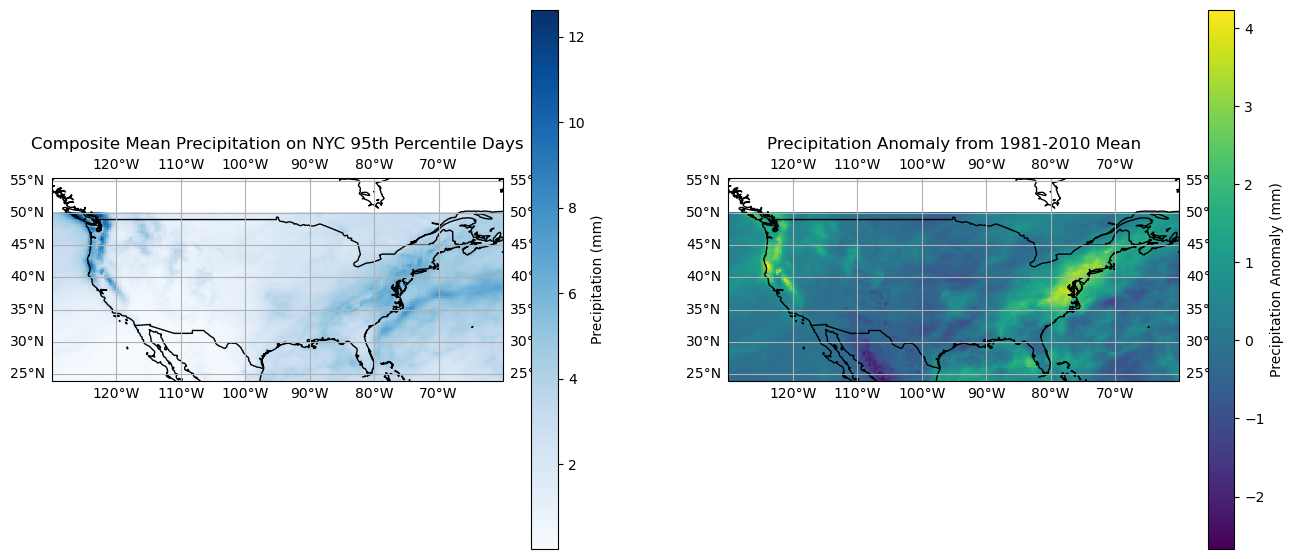

In [40]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Set up a single figure with 2 panels
fig, axes = plt.subplots(1, 2, figsize=(16,7), subplot_kw={'projection': ccrs.PlateCarree()})

# Composite mean precipitation
ax = axes[0]
ax.set_extent([-130, -60, 24, 50])  # lon/lat in degrees west
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)
pcm = ax.pcolormesh(
    us_composite.longitude - 360,  # convert from 0-360 to -180 to 180
    us_composite.latitude,
    us_composite,
    cmap='Blues',
    shading='auto'
)
fig.colorbar(pcm, ax=ax, orientation='vertical', label='Precipitation (mm)')
ax.set_title('Composite Mean Precipitation on NYC 95th Percentile Days')

# Precipitation anomaly
ax = axes[1]
ax.set_extent([-130, -60, 24, 50])
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)
pcm = ax.pcolormesh(
    us_anomaly.longitude - 360,
    us_anomaly.latitude,
    us_anomaly,
    shading='auto'
)
fig.colorbar(pcm, ax=ax, orientation='vertical', label='Precipitation Anomaly (mm)')
ax.set_title('Precipitation Anomaly from 1981-2010 Mean')
plt.show()
